170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4612 - loss: 1.5280

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 67ms/step - accuracy: 0.4613 - loss: 1.5277 - val_accuracy: 0.6176 - val_loss: 1.0841
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6605 - loss: 0.9693 - val_accuracy: 0.6170 - val_loss: 1.1464
Epoch 3/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7235 - loss: 0.7941

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 65ms/step - accuracy: 0.7235 - loss: 0.7941 - val_accuracy: 0.6944 - val_loss: 0.8814
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 66ms/step - accuracy: 0.7565 - loss: 0.7022 - val_accuracy: 0.6601 - val_loss: 0.9570
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 65ms/step - accuracy: 0.7848 - loss: 0.6245 - val_accuracy: 0.6932 - val_loss: 0.9263
Epoch 6/20
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8072 - loss: 0.5591

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.8072 - loss: 0.5591 - val_accuracy: 0.7185 - val_loss: 0.8495
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 65ms/step - accuracy: 0.8254 - loss: 0.5030 - val_accuracy: 0.6444 - val_loss: 1.1620
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.8395 - loss: 0.4572 - val_accuracy: 0.7137 - val_loss: 0.8941
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 64ms/step - accuracy: 0.8585 - loss: 0.4081 - val_accuracy: 0.7117 - val_loss: 0.9280
313/313 - 6s - 19ms/step - accuracy: 0.7117 - loss: 0.9280
Test Accuracy: 0.7117000222206116
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Classification Report:
              precision    recall  f1-score   support

    Airplane       0.72      0.76      0.74      1000
  Automobile       0.85      0.82      0.84      1000
        Bird       0.72      0.51      0.60      1000
         Cat       0.53      0.53      0.53      1000
        Deer       0.63      0.77      0.69      1

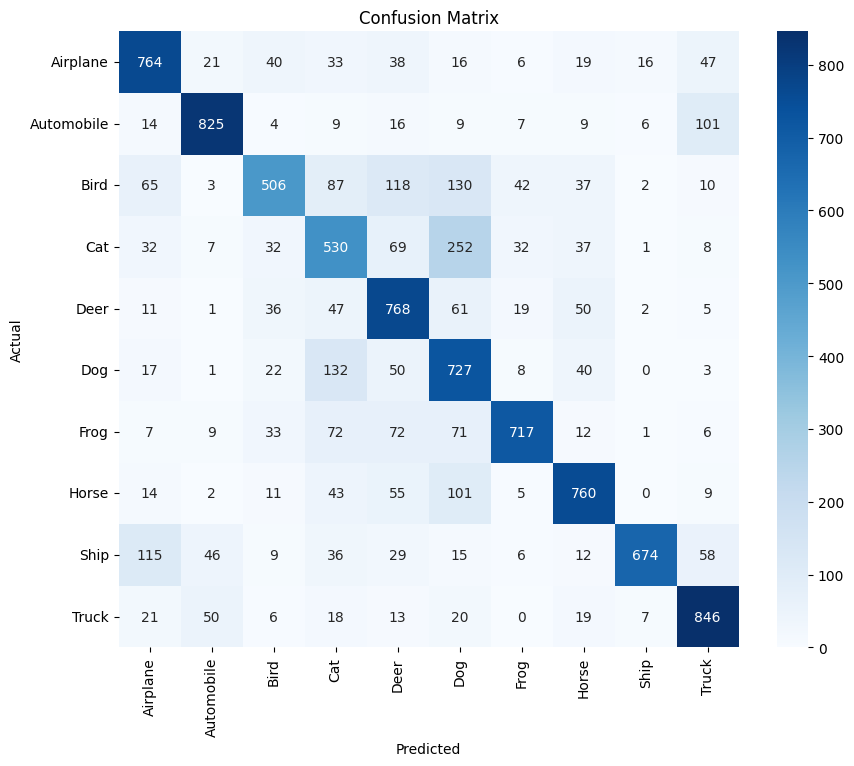

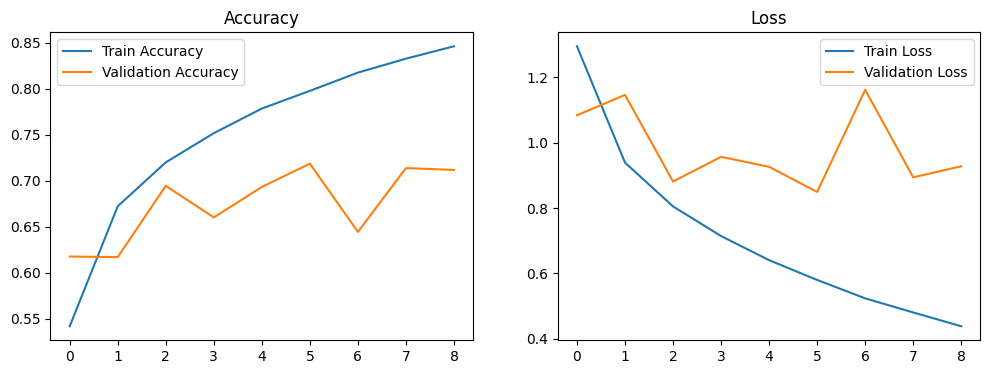

''

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test),)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
